In [1]:
!pip install pandas numpy lxml openpyxl matplotlib

In [2]:
import pandas as pd
import numpy as np
from datetime import date

In [3]:
YEAR_MIN = 2002
YEAR_MAX = 2022

In [107]:
def weeks_in_year(year):
    if int(year) < 2021:
        return 17
    if year == 2022:
        return 18
    raise Exception('Invalid Year')

In [108]:
def get_stats_for_week(position, year, week, scoring='PPR'):
    url = f'https://www.fantasypros.com/nfl/stats/{position}.php?year={year}&week={week}&scoring={scoring}&range=week'
    html = pd.read_html(url, header=1)
    df = html[0]
    return df

In [91]:
week_df = get_stats_for_week('qb', 2021, 1)

In [92]:
week_df.head()

,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST
0,1,Kyler Murray (ARI),21,32,65.6,289,9.0,4,1,2,5,20,1,0,1,34.6,34.6,98.7%
1,2,Patrick Mahomes II (KC),27,36,75.0,337,9.4,3,0,2,5,18,1,0,1,33.3,33.3,100.0%
2,3,Jared Goff (DET),38,57,66.7,338,5.9,3,1,3,3,14,0,0,1,29.9,29.9,42.8%
3,4,Jameis Winston (NO),14,20,70.0,148,7.4,5,0,0,6,37,0,0,1,29.6,29.6,34.2%
4,5,Tom Brady (TB),32,50,64.0,379,7.6,4,2,0,0,0,0,0,1,29.2,29.2,95.0%


In [93]:
def clean_weekly_stats(position, year, week, week_df):
    week_df_copy = week_df.copy()
    week_df_copy['Player'] = week_df_copy['Player'].apply(lambda p: p.split('(')[0].strip())
    week_df_copy['Year'] = week_df_copy['Player'].apply(lambda p: year)
    week_df_copy['Week'] = week_df_copy['Player'].apply(lambda p: week)
    week_df_copy['Position'] = week_df_copy['Player'].apply(lambda p: position)
    return week_df_copy

In [94]:
clean_df = clean_weekly_stats('qb', 2021, 1, week_df)

In [95]:
clean_df.head()

,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,...,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST,Year,Week,Position
0,1,Kyler Murray,21,32,65.6,289,9.0,4,1,2,...,20,1,0,1,34.6,34.6,98.7%,2021,1,qb
1,2,Patrick Mahomes II,27,36,75.0,337,9.4,3,0,2,...,18,1,0,1,33.3,33.3,100.0%,2021,1,qb
2,3,Jared Goff,38,57,66.7,338,5.9,3,1,3,...,14,0,0,1,29.9,29.9,42.8%,2021,1,qb
3,4,Jameis Winston,14,20,70.0,148,7.4,5,0,0,...,37,0,0,1,29.6,29.6,34.2%,2021,1,qb
4,5,Tom Brady,32,50,64.0,379,7.6,4,2,0,...,0,0,0,1,29.2,29.2,95.0%,2021,1,qb


In [103]:
def get_stats_for_year(position, year):
    weeks = weeks_in_year(year)
    week_dfs = []
    for week in range(1, weeks + 1):
        week_df = get_stats_for_week(position, year, week)
        clean_week_df = clean_weekly_stats(position, year, week, week_df)
        week_dfs.append(clean_week_df)
    return pd.concat(week_dfs)

In [104]:
def get_stats_for_year_range(position, year_start, year_end):
    year_dfs = []
    for year in range(year_start, year_end + 1):
        year_df = get_stats_for_year(position, year)
        year_dfs.append(year_df)
    return pd.concat(year_dfs)

In [105]:
dfs = get_stats_for_year_range('qb', 2010, 2021)

In [106]:
dfs

,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,...,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST,Year,Week,Position
0,1,Peyton Manning,40,57,70.2,433,7.6,3,0,2,...,0,0,0,1,29.3,29.3,0.0%,2010,1,qb
1,2,Tom Brady,25,35,71.4,258,7.4,3,0,0,...,0,0,0,1,22.3,22.3,95.0%,2010,1,qb
2,3,Michael Vick,16,24,66.7,175,7.3,1,0,3,...,103,0,0,1,21.3,21.3,0.1%,2010,1,qb
3,4,Jay Cutler,23,35,65.7,372,10.6,2,1,4,...,22,0,1,1,21.1,21.1,0.2%,2010,1,qb
4,5,Carson Palmer,34,50,68.0,345,6.9,2,1,1,...,9,0,0,1,20.7,20.7,5.6%,2010,1,qb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,36,Mitch Trubisky,1,1,100.0,15,15.0,0,0,0,...,-3,0,0,1,0.3,0.3,5.2%,2021,18,qb
36,37,Cam Newton,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0.0,0.0,9.1%,2021,18,qb
37,38,Cooper Rush,1,1,100.0,10,10.0,0,0,0,...,-4,0,0,1,0.0,0.0,3.1%,2021,18,qb
38,39,Blaine Gabbert,0,2,0.0,0,0.0,0,0,0,...,-1,0,0,1,-0.1,-0.1,0.0%,2021,18,qb


In [53]:
len(dfs['Team'].unique())

33

In [54]:
tb_df = dfs[dfs['Player'] == 'Tom Brady']

In [55]:
tb_df.head()

,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,...,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST,Year,Week,Team
1,2,Tom Brady,25,35,71.4,258,7.4,3,0,0,...,0,0,0,1,22.3,22.3,95.8%,2010,1,TB
17,18,Tom Brady,20,36,55.6,248,6.9,2,2,1,...,0,0,1,1,11.9,11.9,95.8%,2010,2,TB
3,4,Tom Brady,21,27,77.8,252,9.3,3,0,1,...,6,0,0,1,22.7,22.7,95.8%,2010,3,TB
20,21,Tom Brady,19,24,79.2,153,6.4,1,0,3,...,6,0,0,1,10.7,10.7,95.8%,2010,4,TB
21,22,Tom Brady,27,44,61.4,292,6.6,1,2,3,...,1,0,0,1,11.8,11.8,95.8%,2010,6,TB


In [56]:
tb_df.tail()

,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,...,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST,Year,Week,Team
1,2,Tom Brady,31,46,67.4,363,7.9,2,0,2,...,16,1,0,1,30.1,30.1,95.8%,2021,14,TB
28,29,Tom Brady,26,48,54.2,214,4.5,0,1,4,...,2,0,1,1,5.8,5.8,95.8%,2021,15,TB
17,18,Tom Brady,18,30,60.0,232,7.7,1,0,0,...,11,0,0,1,14.4,14.4,95.8%,2021,16,TB
2,3,Tom Brady,34,50,68.0,410,8.2,3,1,1,...,0,0,0,1,27.4,27.4,95.8%,2021,17,TB
5,6,Tom Brady,29,37,78.4,326,8.8,3,0,1,...,0,0,0,1,25.0,25.0,95.8%,2021,18,TB


<AxesSubplot: >

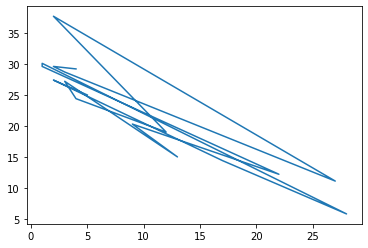

In [15]:
tb_df['FPTS'].plot()

In [33]:
html = pd.read_html('https://www.pro-football-reference.com/years/2022/games.htm')

In [36]:
df = html[0]

In [39]:
df.head()

,Week,Day,Date,Time,Winner/tie,Unnamed: 5,Loser/tie,Unnamed: 7,PtsW,PtsL,YdsW,TOW,YdsL,TOL
0,1,Thu,2022-09-08,8:20PM,Buffalo Bills,@,Los Angeles Rams,boxscore,31,10,413,4,243,3
1,1,Sun,2022-09-11,1:00PM,New Orleans Saints,@,Atlanta Falcons,boxscore,27,26,385,1,416,2
2,1,Sun,2022-09-11,1:00PM,Philadelphia Eagles,@,Detroit Lions,boxscore,38,35,455,0,386,1
3,1,Sun,2022-09-11,1:00PM,Baltimore Ravens,@,New York Jets,boxscore,24,9,274,1,380,2
4,1,Sun,2022-09-11,1:00PM,Cleveland Browns,@,Carolina Panthers,boxscore,26,24,355,0,261,1


In [41]:
team_to_symbol = {
    'Buffalo Bills': 'BUF',
    'New Orleans Saints': 'NO',
    'Los Angeles Rams': 'LAR',
}

In [137]:
tb_pfr_html = pd.read_html('https://www.pro-football-reference.com/players/B/BradTo00/gamelog/2019', header=[0,1])

In [138]:
len(tb_pfr_html)

2

In [139]:
df_1 = tb_pfr_html[0]

In [140]:
df_1.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk               Date                 G#               Week   
0                1.0         2019-09-08                1.0                1.0   
1                2.0         2019-09-15                2.0                2.0   
2                3.0         2019-09-22                3.0                3.0   
3                4.0         2019-09-29                4.0                4.0   
4                5.0         2019-10-06                5.0                5.0   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
                 Age                 Tm Unnamed: 6_level_1                Opp   
0             42.036                NWE                NaN                PIT   
1             42.043                NWE                  @                MIA   
2             42.050                NWE                NaN                NYJ   
3             42.057                NWE                  @                BUF   
4             42.064                NWE                  @                WAS   

  Unnamed: 8_level_0 Unnamed: 9_level_0  ... Fumbles           Off. Snaps  \
              Result                 GS  ...      FF FR Yds TD        Num   
0             W 33-3                  *  ...       0  0   0  0       70.0   
1             W 43-0                  *  ...       0  0   0  0       71.0   
2            W 30-14                  *  ...       0  0   0  0       72.0   
3            W 16-10                  *  ...       0  0   0  0       63.0   
4             W 33-7                  *  ...       0  0   0  0       71.0   

        Def. Snaps     ST Snaps      
    Pct        Num Pct      Num Pct  
0  100%        0.0  0%      0.0  0%  
1  100%        0.0  0%      0.0  0%  
2   95%        0.0  0%      0.0  0%  
3  100%        0.0  0%      0.0  0%  
4   92%        0.0  0%      0.0  0%  

[5 rows x 39 columns]

In [141]:
df_2 = tb_pfr_html[1]

In [142]:
df_2.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk               Date                 G#               Week   
0                  1         2020-01-04                 18                 18   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
                 Age                 Tm Unnamed: 6_level_1                Opp   
0             42.154                NWE                NaN                TEN   

  Unnamed: 8_level_0 Unnamed: 9_level_0  ... Passing                    \
              Result                 GS  ...      Sk Yds.1   Y/A  AY/A   
0            L 13-20                  *  ...       0     0  5.65  4.43   

  Off. Snaps       Def. Snaps     ST Snaps      
         Num   Pct        Num Pct      Num Pct  
0         61  100%          0  0%        0  0%  

[1 rows x 27 columns]

In [143]:
df_2.columns

MultiIndex([('Unnamed: 0_level_0',                 'Rk'),
            ('Unnamed: 1_level_0',               'Date'),
            ('Unnamed: 2_level_0',                 'G#'),
            ('Unnamed: 3_level_0',               'Week'),
            ('Unnamed: 4_level_0',                'Age'),
            ('Unnamed: 5_level_0',                 'Tm'),
            ('Unnamed: 6_level_0', 'Unnamed: 6_level_1'),
            ('Unnamed: 7_level_0',                'Opp'),
            ('Unnamed: 8_level_0',             'Result'),
            ('Unnamed: 9_level_0',                 'GS'),
            (           'Passing',                'Cmp'),
            (           'Passing',                'Att'),
            (           'Passing',               'Cmp%'),
            (           'Passing',                'Yds'),
            (           'Passing',                 'TD'),
            (           'Passing',                'Int'),
            (           'Passing',               'Rate'),
            ( 